### Підготовка даних


In [202]:
import pandas as pd
import numpy as np
import seaborn as sns

In [203]:
df1 = pd.read_csv('df_score1.csv')
df2 = pd.read_csv('df_score2.csv')
df3 = pd.read_csv('df_score3.csv')
df4 = pd.read_csv('df_score4.csv')

In [204]:
df = pd.concat([df1, df2, df3, df4])

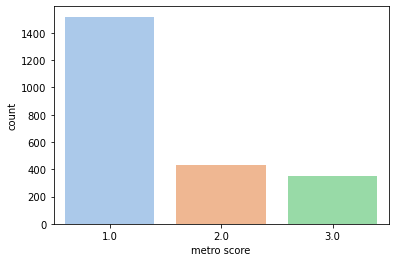

In [205]:
sns.countplot(x='metro score', data=df, palette='pastel');

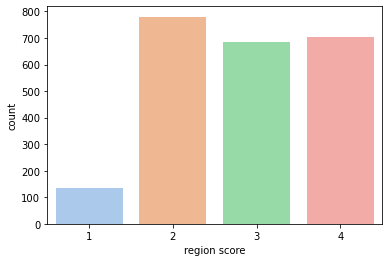

In [206]:
sns.countplot(x='region score', data=df, palette='pastel');

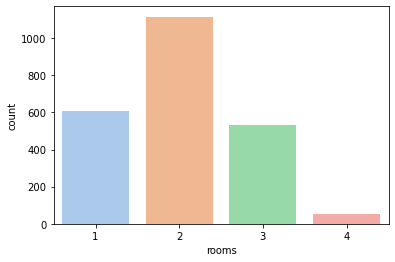

In [207]:
sns.countplot(x='rooms', data=df, palette='pastel');

In [208]:
df.isnull().sum()

region                0
region score          0
area                  0
rooms                 0
appartment complex    0
price                 0
adress                0
coordinates           1
metro distance        1
metro score           1
dtype: int64

In [209]:
df = df.dropna(how='any',axis=0) 
df.reset_index(drop=True, inplace=True)

### Rooms

/home/nastia/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


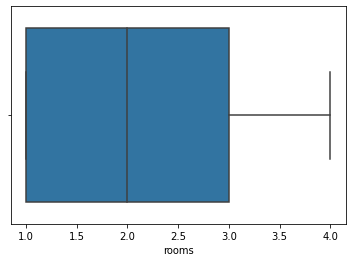

In [210]:
sns.boxplot(df['rooms']);

In [211]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr,ur = remove_outlier(df['rooms'])
print('Rooms')
print("lower range",lr, "and upper range", ur)

Rooms
lower range -2.0 and upper range 6.0


In [212]:
df.drop(df[df['rooms'] > 3].index, inplace =True)
df.reset_index(drop=True, inplace=True)

/home/nastia/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


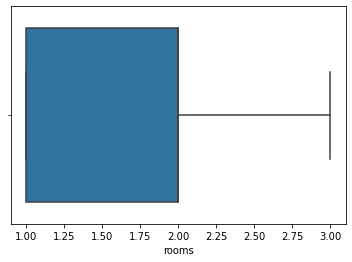

In [213]:
sns.boxplot(df['rooms']);

### Area

/home/nastia/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


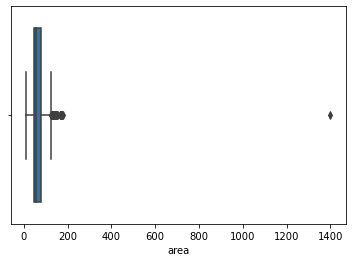

In [214]:
sns.boxplot(df['area']);

In [215]:
lr,ur = remove_outlier(df['area'])
lr = 20
print("lower range",lr, "and upper range", ur)


lower range 20 and upper range 123.0


In [216]:
df.drop(df[df['area'] > 113].index, inplace =True)
df.reset_index(drop=True, inplace=True)

/home/nastia/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


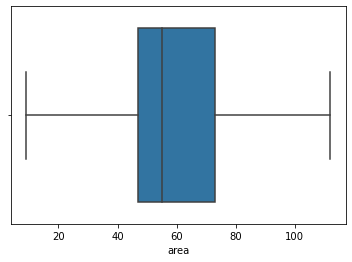

In [217]:
sns.boxplot(df['area']);

### Price

/home/nastia/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


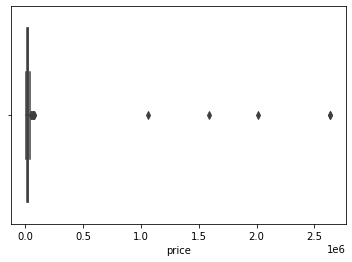

In [218]:
sns.boxplot(df['price']);

In [219]:
lr,ur = remove_outlier(df['price'])
print('Price')
print("lower range",lr, "and upper range", ur)

Price
lower range -2100.0 and upper range 43500.0


In [220]:
df.drop(df[df['price'] > 44000].index, inplace =True)
df.reset_index(drop=True, inplace=True)



/home/nastia/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


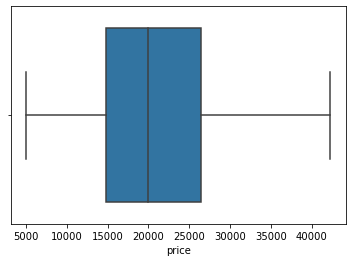

In [221]:
sns.boxplot(df['price']);

-------

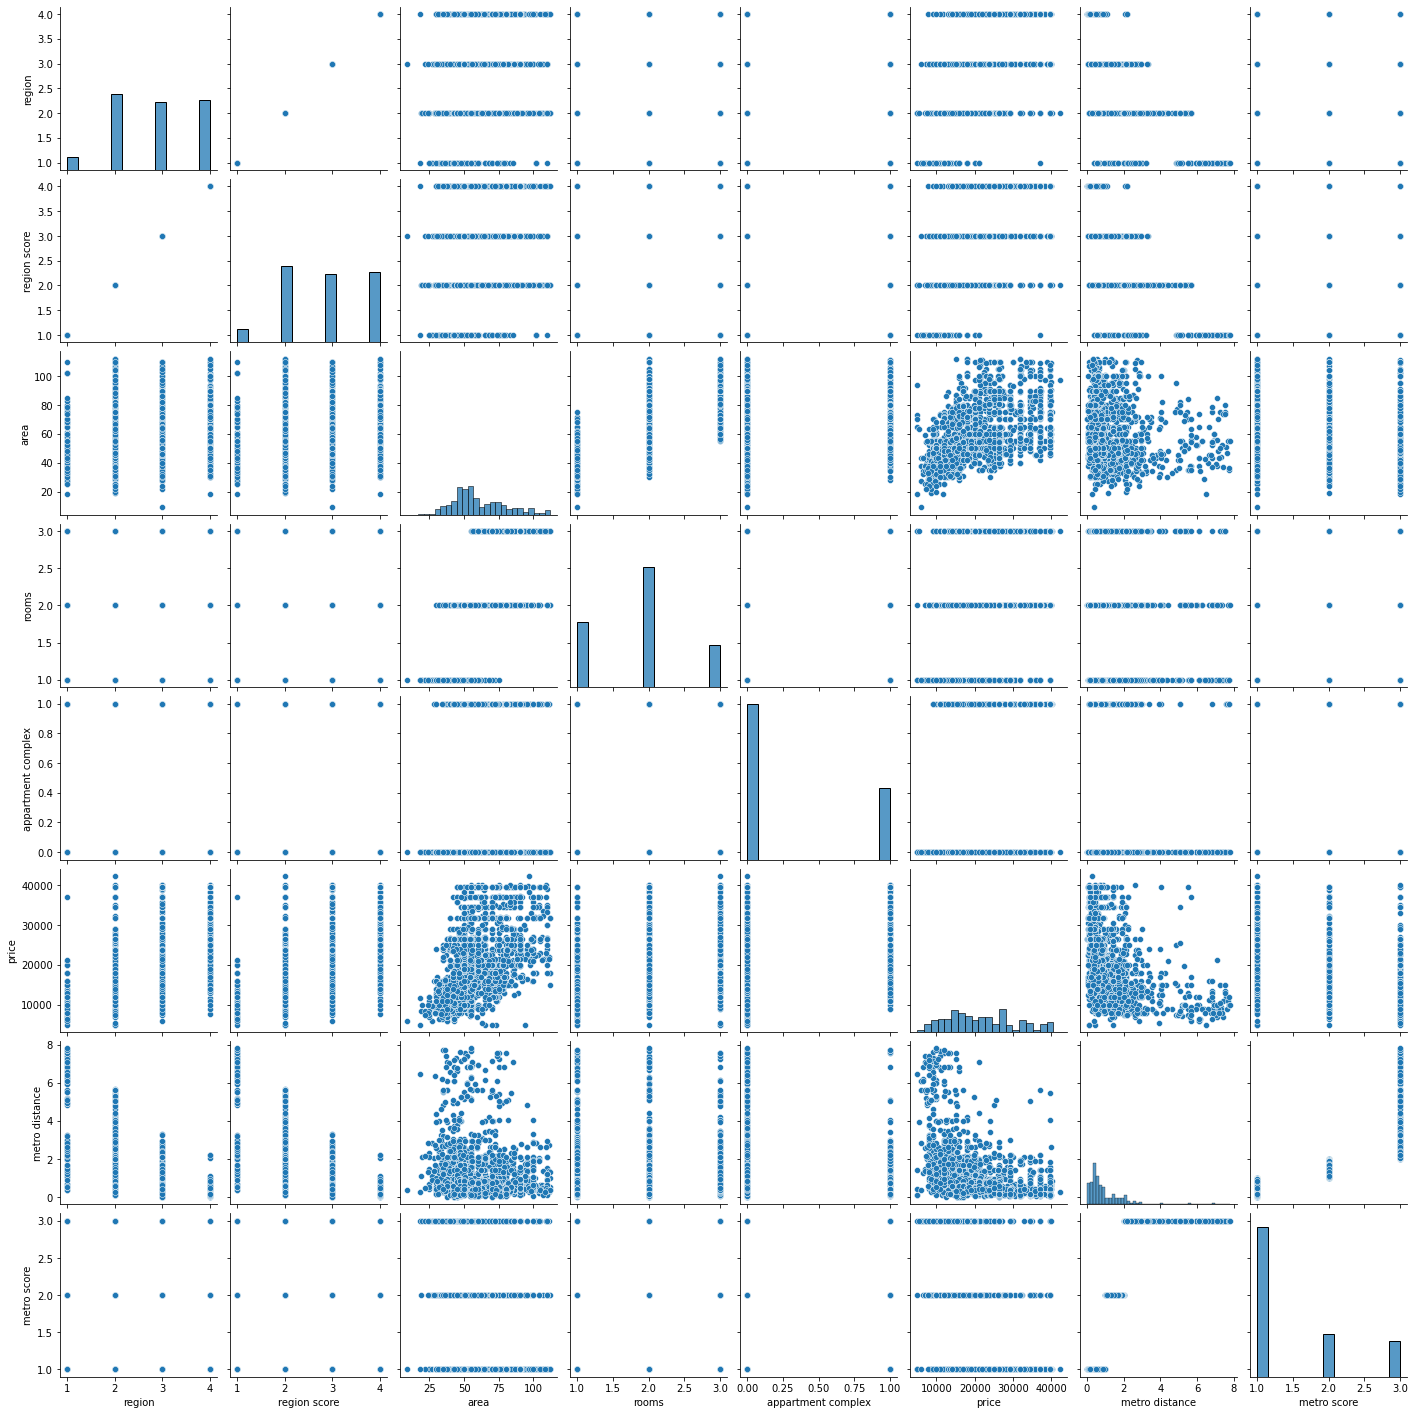

In [222]:
sns.pairplot(df)

In [223]:
df = df.drop(['region', 'adress', 'coordinates'], axis=1)

In [224]:
df = df[['region score', 'metro score', 'metro distance', 'appartment complex','rooms', 'area', 'price']]
df

,region score,metro score,metro distance,appartment complex,rooms,area,price
0,1,2.0,1.64,0,2,50.0,10000
1,1,1.0,0.68,1,1,43.0,13000
2,1,3.0,7.25,0,3,75.0,15000
3,1,3.0,5.64,0,1,38.0,6000
4,1,3.0,6.11,0,1,38.0,6000
...,...,...,...,...,...,...,...
2090,4,1.0,0.85,0,2,64.0,31700
2091,4,1.0,0.16,1,2,72.0,37000
2092,4,1.0,0.12,1,1,55.0,39600
2093,4,1.0,0.16,1,1,43.0,26400


In [225]:

# # Збереження датасету в файл df_data.csv
df.to_csv('data_score-1234.csv', index=False)